# Neural Network

In [1]:
# !pip install tensorflow
!pip install tensorflow

In [2]:
# TF allows to train automatic learning models
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# PIL allows to show and manipulate images in Python
from PIL import Image
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

##**Classification Problem**
Next, a classification problem will be solved with a multi-layer neural network with non-linear activation functions. The advantage to add hidden layers to a network lies in the fact that it allows it to solve more complex problems.

##**MNIST Dataset**
For this problem the images DB od MNIST will be used, it contains images with numbers writen by hand from 0 to 9. The purpose of this problem will be to contruct a multi-layer neural network where the data input will be an image and the data output will be the number writen in the image.

##**Data Training Preparation**
To start the data needs to be retrieved, TensorFlow comes with several examples of DB to use and MNIST is one of them, which is why it can ve downloaded directly from TensorFlow.

In [3]:
# https://keras.io/examples/
# Labeled images to be diveded in train and test data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [5]:
# Showing a small sample of the images
def show_images(images, gray=True):
    fig=plt.figure(figsize=(8, 8))
    index = np.random.randint(len(images), size=100)
    for i in range(100):
        fig.add_subplot(10, 10, i+1)
        plt.axis('off')
        if gray:
            color = 'gray'
        else:
            color = None
        plt.imshow(images[index[i]].reshape([28, 28]), cmap=color)
    plt.show()

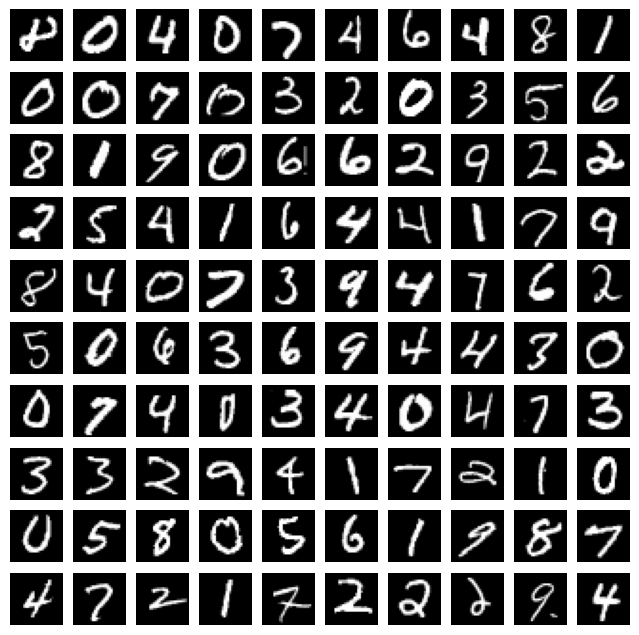

In [6]:
show_images(x_train)

The images are of 28x28 pixels in black and white. There are diferent numbers with several shapes since they have been handwritten, which is why it would be challenging to the network to learn to differentiate between numbers and to learn which ones are the same.

The images are numpy arrays which is why they can be treated as such and use the attributes and functions they have, such as the 'shape' attribute.

In [7]:
# Details of the input data
print("Number of images to train: ", x_train.shape[0])
print("Number of images to test: ", x_test.shape[0])
print("Size of the images to train: ", x_train.shape)

Number of images to train:  60000
Number of images to test:  10000
Size of the images to train:  (60000, 28, 28)


In [8]:
print("Example of output: ", y_train[0])

Example of output:  5


In [9]:
# Given that the images are in black and white, each pixel has a value between 0 and 255, with 0 being black and 255 white. The complete values of an image are:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
img = x_train[0]
print("Values of an Image:")
print(img)

Values of an Image:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 25

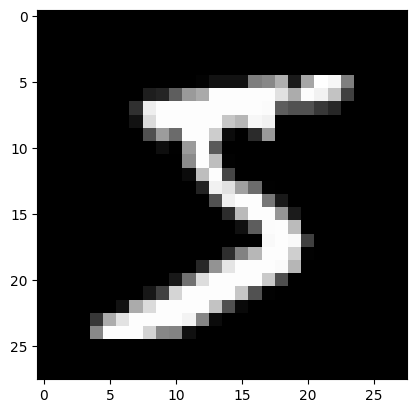

In [11]:
# The image that is seen is:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [12]:
# To see the value of y of said image, it's corresponding value can be accessed:
y_train[0]

5

In [13]:
# Given that the values are between 0 and 255, for the training result to be optim is preferable to normalize the values between 0 and 1 as it follows:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [14]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## **Network Construction**

To construct the network, input and outpud data need to be defined:

*   The Input Data will be the images of 28x28 pixels, which in total are $28x28 = 784$ values between 0 to 1 given that they are normalized black and white images. Therefore, the input of the network will be of a dimension of 784 (28x28).
*   The Output Data of the network will be the prediction between the number there is in the image. Since there are digits between 0 to 9, the dimension of the output of the network will be of 10 per category, where each value will be the probaility of said number. The category with the highest probability, will be the number that the network will classify.

To define the type of activation function that each layer will have, once a layer is defined so can be the argument of activation it will be. The activation functions that TensorFlow offers are: https://www.tensorflow.org/api_docs/python/tf/keras/activations.

In [15]:
# Layers of the neural network
model = tf.keras.models.Sequential([
  # Size of the entrance and transformation of the data in an unidimensional plane: from 28x28 pixels to a 784 elemnts array
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # Addition of a hidden layer with 64 neurons and RELU activation function
  tf.keras.layers.Dense(64, activation='relu'),
  # Addition of another hidden layer with 128 neurons and RELU activation function
  tf.keras.layers.Dense(128, activation='relu'),
  # Addition of the output layer with 10 neurons and Softmax activation function to generate probabilities per class, ensuring that the sum of all outputs is 1
  tf.keras.layers.Dense(10, activation='softmax')
])

In [16]:
# Model summary of what was defined
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 59850 (233.79 KB)
Trainable params: 59850 (233.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Model Training**

Once the network is defined, the training can be configurated to define:

*   **Optimizer:** using the optimizer adam and changing the learning rate.
Loss: using the cost function Sparse Categorical Crossentropy given that it´s a classification problem and the output is configurated with labels between 0 to 9.
*   Metrics: **texto en negrita** being a classification provlem, the precision of the model will be evaluated.
*   **Batch Size:** establishing a batch size of 128.
*   **Epochs:** establishing the number of epochs to 10.

In [17]:
# Optimizer and training factor definition: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# Compilation of the model
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
# The output corroborates that the network learns with each epoch, reducing the prediction error and improving the precision
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2603 - accuracy: 0.9243 - val_loss: 0.1349 - val_accuracy: 0.9589
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1108 - accuracy: 0.9657 - val_loss: 0.0970 - val_accuracy: 0.9687
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0826 - accuracy: 0.9740 - val_loss: 0.0860 - val_accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0640 - accuracy: 0.9795 - val_loss: 0.0865 - val_accuracy: 0.9738
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0537 - accuracy: 0.9825 - val_loss: 0.0927 - val_accuracy: 0.9736


## **Model Evaluation**

Next, the model will be evaluated in regards of error and precision:

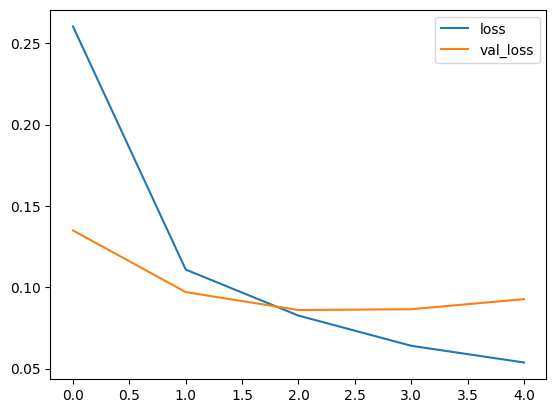

In [19]:
# Plot to visualize the losses process
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

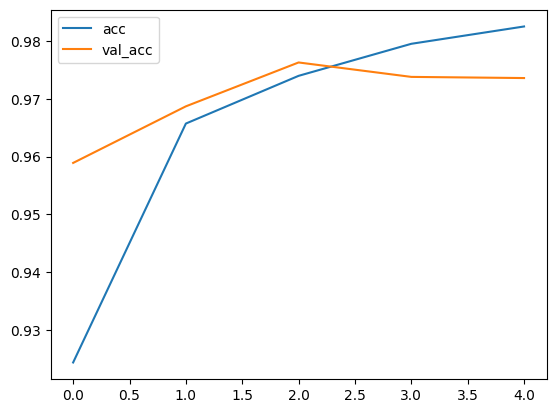

In [20]:
# Plor to visalize the precision process
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()

To observe the behavior of the model, the cases of test can be used:

1/1 [==============================] - 0s 109ms/step


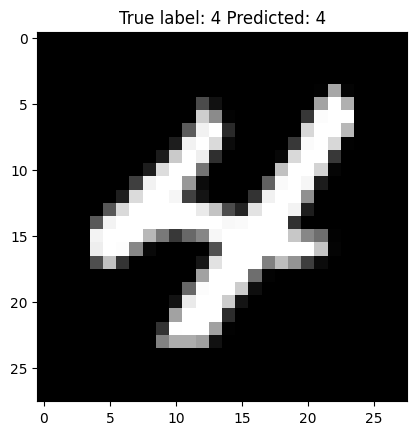

In [21]:
# Random index and its prediction
i = np.random.choice(range(0,x_test.shape[0]))
prediction = model.predict(np.array([x_test[i]])).argmax(axis=1)[0]
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], prediction));

Some fake positives can also be shown to see where the model is failing:

313/313 [==============================] - 1s 2ms/step


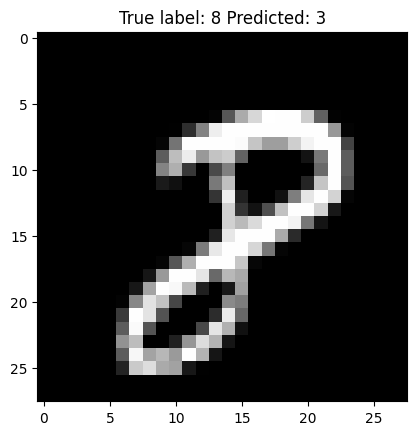

In [22]:
# Predictions of the test
p_test = model.predict(x_test).argmax(axis=1)
# Filter for wrong predictions
misclassified_idx = np.where(p_test != y_test)[0]
# Random index selection
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));